In [2]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error
#데이터 준비
from keras.datasets import mnist,fashion_mnist

(x_data,y_data),(tt_x,tt_y)=fashion_mnist.load_data()
tr_x,val_x,tr_y,val_y=train_test_split(x_data,y_data,test_size=0.2)

s_tr_x=tr_x/255
s_tt_x=tt_x/255
s_val_x=val_x/255

e_tr_x=s_tr_x.reshape(-1, 28, 28,1)
e_tt_x=s_tt_x.reshape(-1, 28, 28,1)
e_val_x=s_val_x.reshape(-1, 28, 28,1)

from keras.utils import to_categorical
e_tr_y=to_categorical(tr_y)
e_tt_y=to_categorical(tt_y)
e_val_y=to_categorical(val_y)

In [3]:
m=Sequential()
m.add(Input(shape=e_tr_x.shape[1:]))#(28,28,1)
m.add(Conv2D(32,3,1,padding='same',activation='relu'))#(28,28,32)
m.add(MaxPooling2D(2))#(14,14,32)
m.add(Conv2D(64,3,1,padding='same',activation='relu'))#(14,14,64)
m.add(MaxPooling2D(2))#(7,7,64)
m.add(Conv2D(128,3,1,padding='same',activation='relu'))#(7,7,128)
m.add(MaxPooling2D(2))#(3,3,128)
m.add(Conv2D(256,3,1,padding='same',activation='relu'))#(3,3,256)
m.add(MaxPooling2D(2))#(1,1,256)
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(10,activation='softmax'))

m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414,550 (1.58 MB)

 Trainable params: 414,550 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
m.compile(loss='categorical_crossentropy',metrics=['acc'])

In [5]:
m_ck1=ModelCheckpoint('best_m.keras',save_best_only=True)
m_ck2=ModelCheckpoint('best_m.weights.h5',save_weights_only=True)

In [6]:
hy=m.fit(e_tr_x,e_tr_y,validation_split=0.2,epochs=10,callbacks=[m_ck1,m_ck2])

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - acc: 0.8046 - loss: 0.5246 - val_acc: 0.8779 - val_loss: 0.3383
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - acc: 0.8862 - loss: 0.3084 - val_acc: 0.8981 - val_loss: 0.2770
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.9062 - loss: 0.2557 - val_acc: 0.9130 - val_loss: 0.2393
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.9191 - loss: 0.2231 - val_acc: 0.9106 - val_loss: 0.2520
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.9277 - loss: 0.1991 - val_acc: 0.9173 - val_loss: 0.2274
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.9338 - loss: 0.1821 - val_acc: 0.9045 - val_loss: 0.2817
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - acc: 0.9396 - loss: 0.1661 - val_acc: 0.9121 - val_loss: 0.2815
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - acc: 0.9446 - loss: 0.1528 - val_acc: 0.9142 - val_loss: 0.2998
Epoch 9/10
1200/1200 ━━━

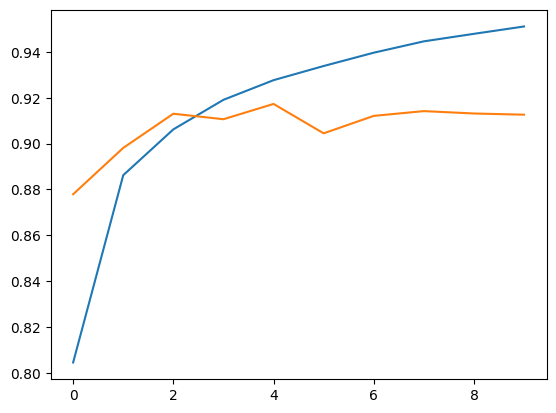

In [7]:
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)

model.save("fashion_cnn_krap.h5")
loaded_model = tf.keras.models.load_model("fashion_cnn_krap.h5")

sample = x_test[0].reshape(1,28,28,1)
pred = loaded_model.predict(sample)
print("예측 클래스:", np.argmax(pred))
print("실제 클래스:", y_test[0])

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8294 - loss: 0.4752 - val_accuracy: 0.8708 - val_loss: 0.3556
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8838 - loss: 0.3230 - val_accuracy: 0.8792 - val_loss: 0.3235
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8991 - loss: 0.2775 - val_accuracy: 0.9007 - val_loss: 0.2747
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9120 - loss: 0.2442 - val_accuracy: 0.9000 - val_loss: 0.2665
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9188 - loss: 0.2211 - val_accuracy: 0.9070 - val_loss: 0.2539


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
예측 클래스: 9
실제 클래스: 9
